In [1]:
import numpy as np
import pandas as pd

import folium

import re

import geopandas

import matplotlib
import matplotlib.pyplot as plt

C:\Users\kusha\anaconda3\envs\geo_env\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
covid_data=pd.read_csv('complete.csv')
covid_data.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [3]:
India_geoJson = geopandas.read_file('india.json')
India_geoJson.head()

,id,district,dt_code,st_nm,st_code,year,geometry
0,None,Aizawl,261,Mizoram,15,2011_c,"POLYGON ((93.04466 23.41052, 92.94680 23.51363..."
1,None,Champhai,262,Mizoram,15,2011_c,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23..."
2,None,Kolasib,263,Mizoram,15,2011_c,"POLYGON ((92.89633 24.39072, 92.86116 24.31374..."
3,None,Lawngtlai,264,Mizoram,15,2011_c,"POLYGON ((92.93456 22.55405, 92.93150 22.39458..."
4,None,Lunglei,265,Mizoram,15,2011_c,"POLYGON ((92.67307 23.38303, 92.68989 23.32804..."


<AxesSubplot:>

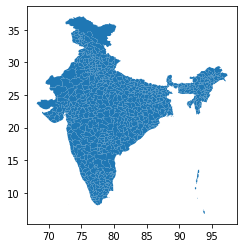

In [4]:
India_geoJson.plot()

In [5]:
covid_data['Date']=pd.to_datetime(covid_data['Date']).apply(lambda x: x - pd.DateOffset(days=1))

In [6]:
covid_data['Death']=pd.to_numeric(covid_data['Death'], errors='coerce')

In [7]:
covid_data.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0.0,0.0,0,0,0
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0.0,0.0,0,0,0
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0.0,0.0,1,0,0
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0.0,0.0,1,0,0
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0.0,0.0,0,0,0


In [8]:
covid_data.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        1
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [9]:
covid_data = covid_data.dropna(how='any',axis=0)

In [10]:
covid_data.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [11]:
covid_data['Name of State / UT']=covid_data['Name of State / UT'].apply(lambda x: re.sub('Union Territory of ','',x))
covid_data['Name of State / UT'].replace('Telengana','Telangana',inplace=True)
covid_data['Name of State / UT'].replace('Dadar Nagar Haveli','Dadra and Nagar Haveli',inplace=True)

In [12]:
id_number={'Andaman and Nicobar Islands': '0',
 'Arunachal Pradesh': '1',
 'Assam': '2',
 'Bihar': '3',
 'Chandigarh': '4',
 'Chhattisgarh': '5',
 'Dadra and Nagar Haveli': '6',
 'Daman and Diu': '7',
 'Goa': '8',
 'Gujarat': '9',
 'Haryana': '10',
 'Himachal Pradesh': '11',
 'Jharkhand': '12',
 'Karnataka': '13',
 'Kerala': '14',
 'Lakshadweep': '15',
 'Madhya Pradesh': '16',
 'Maharashtra': '17',
 'Manipur': '18',
 'Meghalaya': '19',
 'Mizoram': '20',
 'Nagaland': '21',
 'Delhi': '22',
 'Puducherry': '23',
 'Punjab': '24',
 'Rajasthan': '25',
 'Sikkim': '26',
 'Tamil Nadu': '27',
 'Telangana': '28',
 'Tripura': '29',
 'Uttar Pradesh': '30',
 'Uttarakhand': '31',
 'West Bengal': '32',
 'Odisha': '33',
 'Andhra Pradesh': '34',
 'Jammu and Kashmir': '35',
 'Ladakh': '36'}

In [13]:
covid_data['State_id'] = covid_data['Name of State / UT'].map(id_number)

In [14]:
covid_data.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,State_id
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0.0,0.0,0,0,0,14
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0.0,0.0,0,0,0,14
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0.0,0.0,1,0,0,14
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0.0,0.0,1,0,0,14
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0.0,0.0,0,0,0,14


In [15]:
covid_data['Active_cases'] = covid_data['Total Confirmed cases']-(covid_data['Cured/Discharged/Migrated']+covid_data['Death'])

In [16]:
covid_data.isnull().sum()

Date                          0
Name of State / UT            0
Latitude                      0
Longitude                     0
Total Confirmed cases         0
Death                         0
Cured/Discharged/Migrated     0
New cases                     0
New deaths                    0
New recovered                 0
State_id                     90
Active_cases                  0
dtype: int64

In [17]:
covid_data = covid_data.dropna(how='any',axis=0)

In [18]:
covid_data.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
State_id                     0
Active_cases                 0
dtype: int64

In [19]:
bins=np.linspace(min(covid_data['Active_cases']),max(covid_data['Active_cases']),11)
bins

array([     0. ,  15096.6,  30193.2,  45289.8,  60386.4,  75483. ,
        90579.6, 105676.2, 120772.8, 135869.4, 150966. ])

In [20]:
covid_data['color']=pd.cut(covid_data['Active_cases'],bins,labels=['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'],include_lowest=False)
covid_data['color'].replace(np.nan,'#32CD32',inplace=True)

In [21]:
covid_data=covid_data[['Date','State_id','color']]

In [22]:
covid_data.isnull().sum()

Date          0
State_id      0
color       156
dtype: int64

In [23]:
for date in covid_data['Date'].unique():
    diff=set([str(i) for i in range(37)])-set(covid_data[covid_data['Date']==date]['State_id'])
    for i in diff:
         covid_data= pd.concat([covid_data,pd.DataFrame([[date,'#0073CF',i]],columns=['Date','color','State_id'])],ignore_index=True)
covid_data.sort_values('Date',inplace=True)

In [24]:
covid_data['Date']=(covid_data['Date'].astype(np.int64)// 10**9).astype('U10')
covid_dict={}
for i in covid_data['State_id'].unique():
    covid_dict[i]={}
    for j in covid_data[covid_data['State_id']==i].set_index(['State_id']).values:   
        covid_dict[i][j[0]]={'color':j[1],'opacity':0.7}

C:\Users\kusha\AppData\Local\Temp\ipykernel_2000\3373652247.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  covid_data['Date']=(covid_data['Date'].astype(np.int64)// 10**9).astype('U10')


In [25]:
list(covid_dict.items())[10]

('16',
 {'1580256000': {'color': '#0073CF', 'opacity': 0.7},
  '1580342400': {'color': '#0073CF', 'opacity': 0.7},
  '1580428800': {'color': '#0073CF', 'opacity': 0.7},
  '1580515200': {'color': '#0073CF', 'opacity': 0.7},
  '1580601600': {'color': '#0073CF', 'opacity': 0.7},
  '1580688000': {'color': '#0073CF', 'opacity': 0.7},
  '1580774400': {'color': '#0073CF', 'opacity': 0.7},
  '1580860800': {'color': '#0073CF', 'opacity': 0.7},
  '1580947200': {'color': '#0073CF', 'opacity': 0.7},
  '1581033600': {'color': '#0073CF', 'opacity': 0.7},
  '1581120000': {'color': '#0073CF', 'opacity': 0.7},
  '1581206400': {'color': '#0073CF', 'opacity': 0.7},
  '1581292800': {'color': '#0073CF', 'opacity': 0.7},
  '1581379200': {'color': '#0073CF', 'opacity': 0.7},
  '1581465600': {'color': '#0073CF', 'opacity': 0.7},
  '1581552000': {'color': '#0073CF', 'opacity': 0.7},
  '1581638400': {'color': '#0073CF', 'opacity': 0.7},
  '1581724800': {'color': '#0073CF', 'opacity': 0.7},
  '1581811200': {'col

In [26]:
covid_data.dropna(how='any',axis=0)

,Date,State_id,color
0,1580256000,14,#FFEBEB
4615,1580256000,21,#0073CF
4616,1580256000,4,#0073CF
4618,1580256000,0,#0073CF
4619,1580256000,18,#0073CF
...,...,...,...
4578,1596585600,11,#FFEBEB
4579,1596585600,35,#FFEBEB
4580,1596585600,12,#FFEBEB
4574,1596585600,22,#FFEBEB


In [28]:
India_geoJson['state_id']=India_geoJson['st_nm'].map(id_number)
India_geoJson.drop(columns='st_nm',inplace=True)
India_geoJson.head()

,id,district,dt_code,st_code,year,geometry,state_id
0,None,Aizawl,261,15,2011_c,"POLYGON ((93.04466 23.41052, 92.94680 23.51363...",20
1,None,Champhai,262,15,2011_c,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23...",20
2,None,Kolasib,263,15,2011_c,"POLYGON ((92.89633 24.39072, 92.86116 24.31374...",20
3,None,Lawngtlai,264,15,2011_c,"POLYGON ((92.93456 22.55405, 92.93150 22.39458...",20
4,None,Lunglei,265,15,2011_c,"POLYGON ((92.67307 23.38303, 92.68989 23.32804...",20


In [29]:
from folium.plugins import TimeSliderChoropleth

In [32]:
fig6=plt.Figure(figsize=(850,1000))
m6 = folium.Map([24, 84], tiles='cartodbpositron', zoom_start=5)
fig6.get_children()

In [35]:
India_geoJson.drop("id")

KeyError: "['id'] not found in axis"